<a href="https://colab.research.google.com/github/alenzhasulan/dl-nlp/blob/master/%D0%9A%D0%BB%D0%B0%D1%81%D1%81%D0%B8%D1%84%D0%B8%D0%BA%D0%B0%D1%86%D0%B8%D1%8F_%D0%BE%D1%82%D0%B7%D1%8B%D0%B2%D0%BE%D0%B2_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 # Классификация текстов - LSTM 

In [ ]:
import random
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.utils import np_utils
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, Dropout

import matplotlib.pyplot as plt
%matplotlib inline

import itertools  

**Загрузка и просмотр данных**

In [ ]:
reviews = pd.read_excel('reviews.xlsx',header=0,converters={'review_subtitle':str,'review_text':str}, na_filter=False)
reviews.head()

,target,movie_link,author_id,author_name,review_subtitle,review_text
0,good,/film/178563/,/user/311869/,sochi2014,,Настоящее кино. Наше кино. Прекрасная работа с...
1,good,/film/178563/,/user/1591566/,Альберт Попов,Предтеча многого,"Мало того, что сериал «Империя под ударом» (12..."
2,good,/film/178563/,/user/331395/,LennoxL,Срез жизни общества начала 20 го века,Период от реформ Александра Освободителя до пе...
3,good,/film/178563/,/user/4379604/,Ana_K,"Пусть мир погибнет, но восторжествует правосудие",Атмосферный сериал о Российской Империи начала...
4,neutral,/film/178563/,/user/178788/,Skept,Террор  Зло с непредсказуемыми последствиями,Самая большая беда современного общества это т...


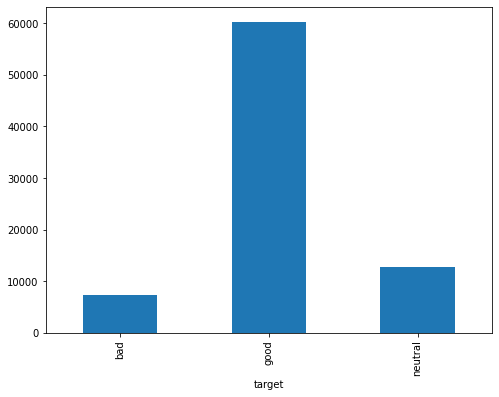

In [ ]:
fig = plt.figure(figsize=(8,6))
reviews.groupby('target').target.count().plot.bar(ylim=0)
plt.show()

**Предобработка текстов**

In [ ]:
reviews['review']=reviews['review_subtitle']+' '+reviews['review_text'] # обьеднием две столбцы в один столбец
reviews['target'] = reviews['target'].factorize()[0] # заменяем метку в цифру {good:0, neutral:1, bad:2 }

print(reviews['review'][0])
print()
print('Метка :', reviews['target'][0])

 Настоящее кино. Наше кино. Прекрасная работа сценариста, режиссёра, операторов. Профессиональный монтаж, музыкальное сопровождение. Превосходная игра актёров.

Работа с таким тонким материалом, как история, требует мастерства и подлинного таланта. Это не фантазия и нахлынувшее воображение, а факты, подлинная история, с которой нельзя не считаться. Прочувственно то неспокойное время. Фильм не отвергает прошлое, как делают в некоторых картин, не старается выкрасить в чёрные цвета действующих лиц. 

Фильм всего лишь повествует о людях, об идеях, о любви. Повествует о стране, которая очень сильно изменилась, но по-прежнему существует. Хочется вериться, что никакие идеи и люди, которые борются за эти идеи, не пойдут по проторённой дороге. Уроки должны быть выучены, особенно уроки истории.

Метка : 0


In [ ]:
X, Y = (reviews['review'].values, reviews['target'].values)

#Label to Vector
encoder = LabelEncoder()
encoder.fit(Y)
encoded_Y = encoder.transform(Y)

y = np_utils.to_categorical(encoded_Y)

**Токенизация**


Создаем токенизатор Keras

In [ ]:
X[:5]

array([' Настоящее кино. Наше кино. Прекрасная работа сценариста, режиссёра, операторов. Профессиональный монтаж, музыкальное сопровождение. Превосходная игра актёров.\n\r\nРабота с\xa0таким тонким материалом, как\xa0история, требует мастерства и\xa0подлинного таланта. Это\xa0не фантазия и\xa0нахлынувшее воображение, а\xa0факты, подлинная история, с\xa0которой нельзя не\xa0считаться. Прочувственно то\xa0неспокойное время. Фильм не\xa0отвергает прошлое, как\xa0делают в\xa0некоторых картин, не\xa0старается выкрасить в\xa0чёрные цвета действующих лиц. \n\r\nФильм всего лишь повествует о\xa0людях, об\xa0идеях, о\xa0любви. Повествует о\xa0стране, которая очень сильно изменилась, но\xa0по-прежнему существует. Хочется вериться, что\xa0никакие идеи и\xa0люди, которые борются за\xa0эти идеи, не\xa0пойдут по\xa0проторённой дороге. Уроки должны быть выучены, особенно уроки истории.',
       'Предтеча многого\x85 Мало того, что\xa0сериал «Империя под\xa0ударом» (12 серий по\xa045-50 мин., по\xa0«д

In [ ]:
tk = Tokenizer(lower = True)

Обучаем токенизатор

In [ ]:
tk.fit_on_texts(X)

In [ ]:
out = dict(itertools.islice(tk.word_counts.items(), 10))
print("Словарь :"+str(out))

Словарь :{'настоящее': 1754, 'кино': 35388, 'наше': 1225, 'прекрасная': 1741, 'работа': 8359, 'сценариста': 793, 'режиссёра': 2484, 'операторов': 184, 'профессиональный': 212, 'монтаж': 907}


Преобразуем в числовое представление

In [ ]:
X_seq = tk.texts_to_sequences(X)

Ограничиваем длину

In [ ]:
MAX_LEN_SENTENCES=100
X_pad = pad_sequences(X_seq, maxlen=MAX_LEN_SENTENCES, padding='post')

In [ ]:
index = 1
print(X[index])
print(X_pad[index])

Предтеча многого Мало того, что сериал «Империя под ударом» (12 серий по 45-50 мин., по «делу» на серию») сам по себе, на удивление, хорош и серьёзен, особенно памятуя то непростое время смены столетий и власти в России (ушёл Ельцин, пришёл Путин, уходили бандитские 90-е, восстанавливался, как мог, законопорядок), так он ещё и, вскоре став культовым, послужил предтечей многих последующих телесериальных работ. Но главное- он, наряду с некоторыми другими лентами, дал нам понять, что в современной России, при желании, терпении, старании и соответственном финансовом вливании, можно и нужно создавать не многосерийную мишуру, а вполне настоящее, только «длинное» Кино для телезрителей. Которое хочется пересматривать ещё и ещё и которое даёт пищу и для эмоций, и для души, и для ума. Особое же спасибо нашей «Империи» за привлечение зрительского внимания к российской истории 19-20-го веков (и к самой тамошней жизни, почему мы уже более 15 лет с удовольствием смотрим и детективы, и мелодрамы «и

**Разделение данных на Train и Test**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_pad, y, test_size = 0.2, random_state = 1)

In [ ]:
batch_size = 1024
X_train1 = X_train[batch_size:]
y_train1 = y_train[batch_size:]
X_valid = X_train[:batch_size]
y_valid = y_train[:batch_size]

**Построение модели**

In [ ]:
vocabulary_size = len(tk.word_counts.keys())+1
max_words = MAX_LEN_SENTENCES

embedding_size = 32
model = Sequential()
model.add(Embedding(vocabulary_size, embedding_size, input_length=max_words))
model.add(Dropout(0.3))
model.add(LSTM(200))
model.add(Dropout(0.5))
model.add(Dense(3, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_6 (Embedding)      (None, 100, 32)           42595616  
_________________________________________________________________
dropout_4 (Dropout)          (None, 100, 32)           0         
_________________________________________________________________
lstm_6 (LSTM)                (None, 200)               186400    
_________________________________________________________________
dropout_5 (Dropout)          (None, 200)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 3)                 603       
Total params: 42,782,619
Trainable params: 42,782,619
Non-trainable params: 0
_________________________________________________________________


Создаем callback для сохранения

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint
model_save_path = 'best_model_rnn.h5'
checkpoint_callback = ModelCheckpoint(model_save_path, 
                                      monitor='val_accuracy',
                                      save_best_only=True,
                                      verbose=1)

**Обучение**

In [ ]:
class_weight={0:1,1:4.5,2:8.5}
history_rnn = model.fit(X_train1,
                        y_train1,
                        validation_data=(X_valid,y_valid),
                        batch_size=batch_size,
                        epochs=3,
                        class_weight=class_weight,
                        callbacks=[checkpoint_callback])

Epoch 1/3
62/62 [==============================] - ETA: 0s - loss: 2.3709 - accuracy: 0.5784WARNING:tensorflow:5 out of the last 10 calls to <function Model.make_test_function.<locals>.test_function at 0x7f4fb788b9d8> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has experimental_relax_shapes=True option that relaxes argument shapes that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/tutorials/customization/performance#python_or_tensor_args and https://www.tensorflow.org/api_docs/python/tf/function for  more details.

Epoch 00001: val_accuracy improved from -inf to 0.72266, saving model to best_model_rnn.h5
62/62 [==============================] - 210s 3s/step - loss: 2.

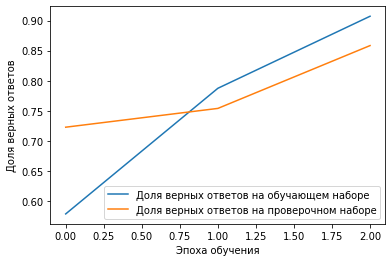

In [ ]:
plt.plot(history_rnn.history['accuracy'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history_rnn.history['val_accuracy'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

**Оценка качества**

In [ ]:
model.load_weights(model_save_path)

In [ ]:
from sklearn import metrics

**Обучающая выборка:**

In [ ]:
y_pred_train=model.predict(X_train)
y_pred_train = y_pred_train > 0.5
print(metrics.classification_report(y_train, y_pred_train, digits=3))

              precision    recall  f1-score   support

           0      0.992     0.984     0.988     48140
           1      0.957     0.950     0.953     10235
           2      0.969     0.978     0.973      5852

   micro avg      0.984     0.978     0.981     64227
   macro avg      0.972     0.971     0.971     64227
weighted avg      0.984     0.978     0.981     64227
 samples avg      0.978     0.978     0.978     64227



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**Тестовая выборка:**

In [ ]:
y_pred_test=model.predict(X_test)
y_pred_test = y_pred_test > 0.5
print(metrics.classification_report(y_test, y_pred_test, digits=3))

              precision    recall  f1-score   support

           0      0.927     0.924     0.925     12049
           1      0.638     0.557     0.595      2579
           2      0.777     0.724     0.750      1429

   micro avg      0.872     0.847     0.860     16057
   macro avg      0.781     0.735     0.757     16057
weighted avg      0.867     0.847     0.857     16057
 samples avg      0.847     0.847     0.847     16057



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
